### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


### Reading CSV File

In [ ]:
df = pd.read_csv("/content/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Columns in the Dataset

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Shape of the Dataset

In [ ]:
df.shape #(rows,columns)

(7043, 21)

In [ ]:
df.info() #summery of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not proper

- 75% customers have tenure less than 55 months

- Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

Text(0.5, 1.02, 'Count of TARGET Variable per category')

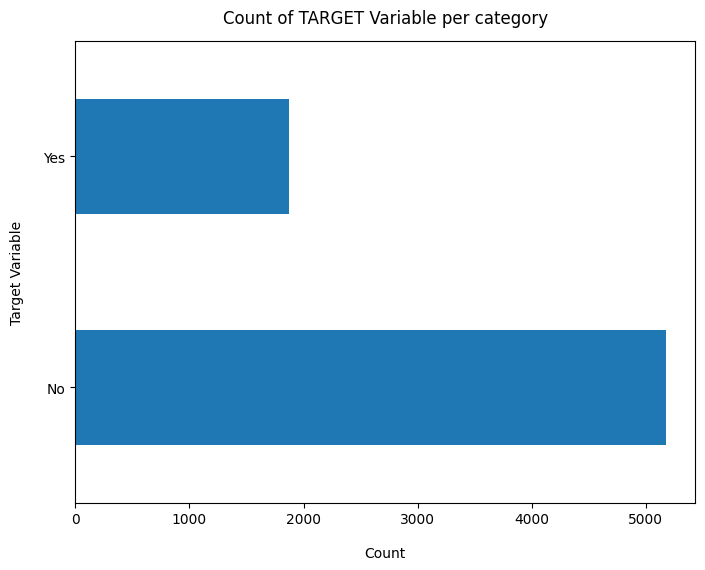

In [ ]:
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [ ]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [ ]:
telco_base_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

- Data is highly imbalanced, ratio = 73:27
- So we analyse the data with other features while taking the target values separately to get some insig

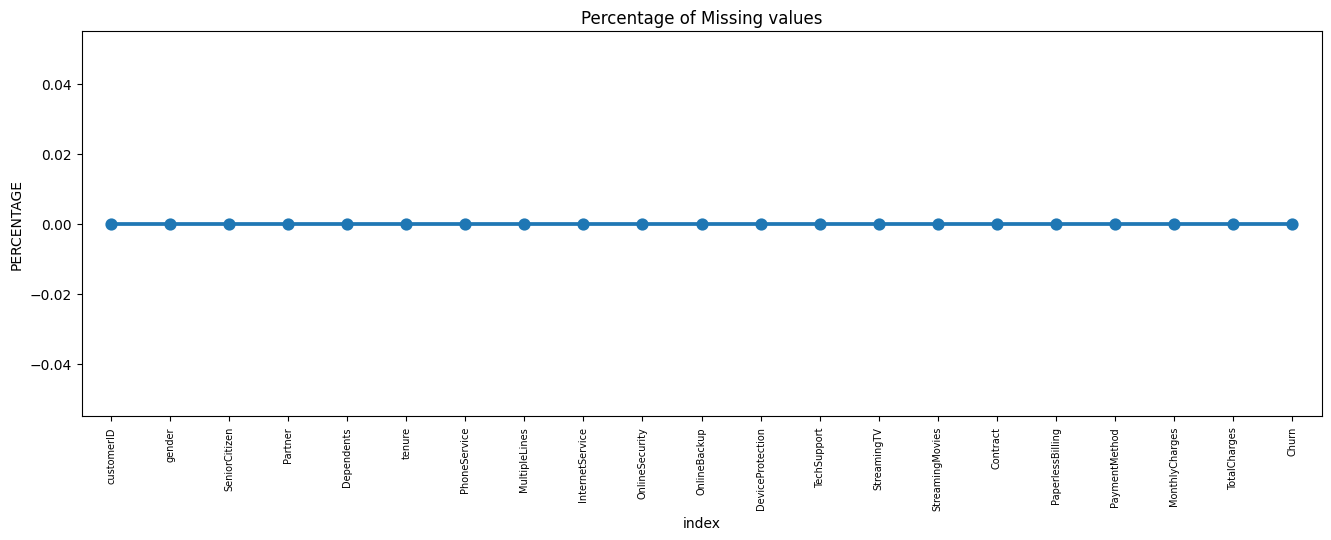

In [ ]:
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()


# Data Preparation

In this section, we will perform data preparation tasks, including:

- **Cleaning Data**

- **Removing Duplicates**

- **Handling Outliers**

- **Dealing with Null Values**

### Total Null Values in the Dataset

In [ ]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df.dropna(inplace = True)
df.shape

(7032, 21)

In [ ]:
df.drop_duplicates()
df.shape

(7032, 21)

### Dropping Invoice customerID and gender

In [ ]:
df.drop(['customerID','gender'],axis=1,inplace=True)

### Unique Values of All Categorical Columns

In [ ]:
for feature in df.columns:
    if df[feature].dtype == object:
      print(f"{feature}: {df[feature].unique()}")

Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


##Handling Outliers

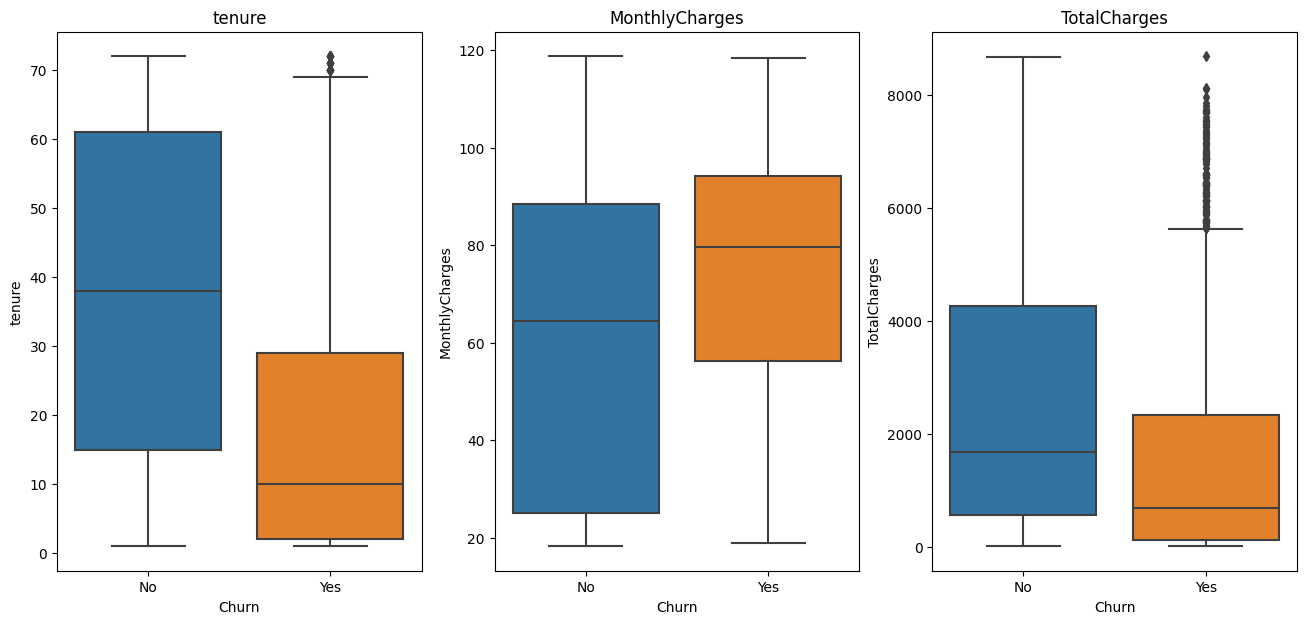

In [ ]:
boxplot_cek1 = ['tenure','MonthlyCharges','TotalCharges']
a=1;
fig, axes = plt.subplots(1,3,figsize=(16,7))
for i in boxplot_cek1:
    plt.subplot(1,3,a)
    a+=1
    ax = sns.boxplot(y=i,x='Churn',data=df)
    plt.title(i)

In [ ]:
churn_yes_indices = df[df['Churn'] == 'Yes'].index
#calculate 25th percentile of annual strikes
percentile25 = df.loc[churn_yes_indices, 'TotalCharges'].quantile(0.25)

#calculate 75th percentile of annual strikes
percentile75 = df.loc[churn_yes_indices, 'TotalCharges'].quantile(0.75)


#calculate interquartile range
iqr = percentile75 - percentile25

#calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

outliers_total_charges = (df.loc[churn_yes_indices, 'TotalCharges'] < lower_limit) | (df.loc[churn_yes_indices, 'TotalCharges'] > upper_limit)
median_total_charges = df.loc[churn_yes_indices, 'TotalCharges'].median()

# Replace outliers with the median value in the original DataFrame
df.loc[churn_yes_indices, 'TotalCharges'] = np.where(outliers_total_charges, median_total_charges, df.loc[churn_yes_indices, 'TotalCharges'])

### Encoding categorical variables using LabelEncoder

In [ ]:
churn_num = {'Yes':1, 'No':0}
df.Churn.replace(churn_num, inplace = True)

In [ ]:
df2 = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create a DataFrame with categorical variables
data = {
    'Partner': ['Yes', 'No'],
    'Dependents': ['Yes', 'No'],
    'PhoneService': ['Yes', 'No'],
    'MultipleLines': ['No phone service' 'No' 'Yes'],
    'InternetService': ['DSL' 'Fiber optic' 'No'],
    'OnlineSecurity': ['No' 'Yes' 'No internet service'],
    'OnlineBackup': ['No' 'Yes' 'No internet service'],
    'DeviceProtection': ['No' 'Yes' 'No internet service'],
    'TechSupport': ['No' 'Yes' 'No internet service'],
    'StreamingTV': ['No' 'Yes' 'No internet service'],
    'StreamingMovies': ['No' 'Yes' 'No internet service'],
    'Contract': ['Month-to-month', 'One year', 'Two year'],
    'PaperlessBilling': ['Yes', 'No'],
    'PaymentMethod': ['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)']
}

# Create a dictionary to store encoded features
encoded_features = {}

# Encode each categorical feature
label_encoder = LabelEncoder()
categorical_features = [ 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])


df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Scaling continous variables using MinMaxScaler

In [ ]:
import pandas as pd
# Print the original min and max values for each feature
print("Original Min and Max values:")
for feature in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    min_val = df[feature].min()
    max_val = df[feature].max()
    print(f"{feature}: Min = {min_val}, Max = {max_val}")

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler and transform the data
df_scaled = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Get the min and max values for each feature after scaling
min_values = scaler.data_min_
max_values = scaler.data_max_

# Print the min and max values for each feature after scaling
print("\nMin and Max values after scaling:")
for feature, min_val, max_val in zip(['tenure', 'MonthlyCharges', 'TotalCharges'], min_values, max_values):
    print(f"{feature}: Min = {min_val}, Max = {max_val}")



Original Min and Max values:
tenure: Min = 1, Max = 72
MonthlyCharges: Min = 18.25, Max = 118.75
TotalCharges: Min = 18.8, Max = 8672.45

Min and Max values after scaling:
tenure: Min = 1.0, Max = 72.0
MonthlyCharges: Min = 18.25, Max = 118.75
TotalCharges: Min = 18.8, Max = 8672.45


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Scaling all the variables to a range of 0 to 1
sc = MinMaxScaler()
df['tenure'] = sc.fit_transform(df[['tenure']])
df['MonthlyCharges'] = sc.fit_transform(df[['MonthlyCharges']])
df['TotalCharges'] = sc.fit_transform(df[['TotalCharges']])
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001277,0
1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.216175,0
2,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010325,1
3,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210541,0
4,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015352,1


##Observation: class imbalance

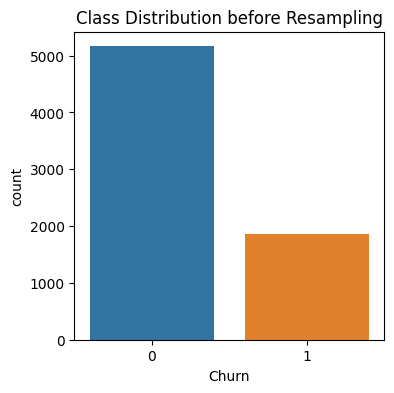

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Churn', data=df)
plt.title('Class Distribution before Resampling')
plt.show()

##Oversampling

In [ ]:
df_no = df[df.Churn == 0]
df_yes = df[df.Churn == 1]

df_yes_unsampled = df_yes.sample(n=len(df_no), replace=True, random_state = 42)
print(len(df_yes_unsampled))

df_unsampled = df_no.append(df_yes_unsampled).reset_index(drop=True)

5163


<ipython-input-60-d9c870a7462c>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_unsampled = df_no.append(df_yes_unsampled).reset_index(drop=True)


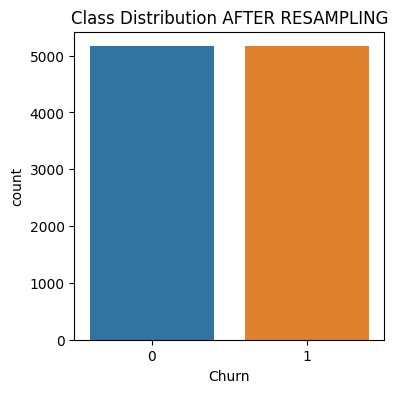

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Churn', data=df_unsampled)
plt.title('Class Distribution AFTER RESAMPLING')
plt.show()

In [ ]:
df_unsampled.shape

(10326, 19)

##Data Visualization

In [ ]:
#done in POWER-BI

In [ ]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing

In [ ]:
#Removing missing values
telco_data.dropna(how = 'any', inplace = True)

#telco_data.fillna(0)

Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [ ]:
# Get the max tenure
print(telco_data['tenure'].max()) #72

72


In [ ]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [ ]:
telco_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [ ]:
# Remove columns not required for processing
# drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# **Data Exploration**

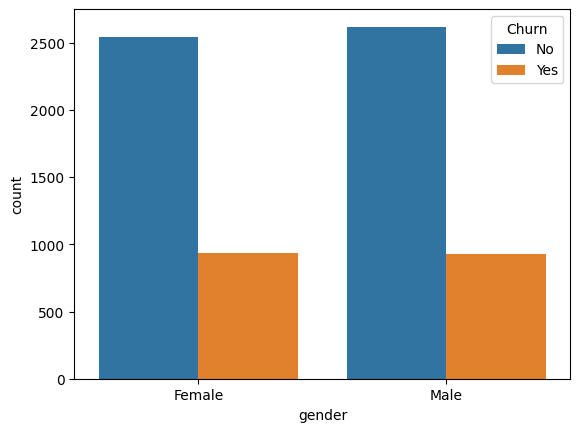

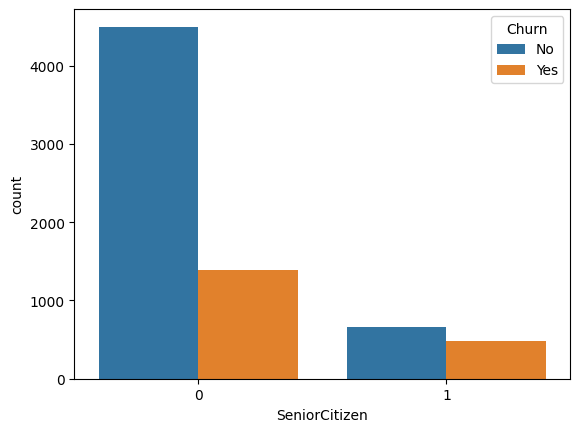

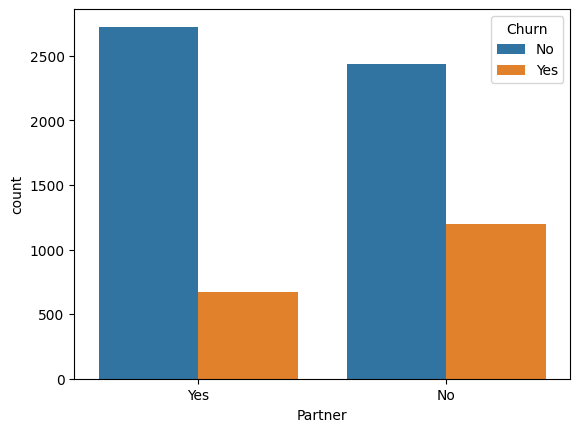

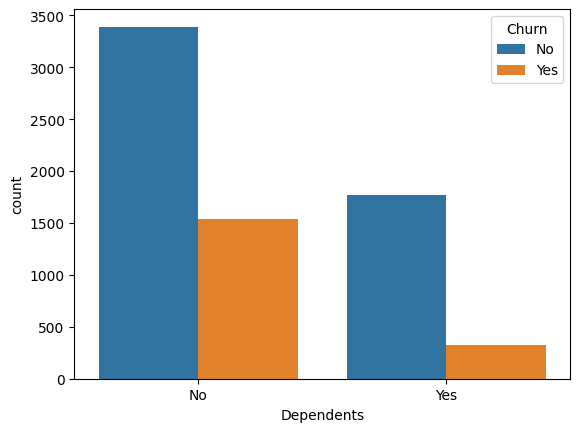

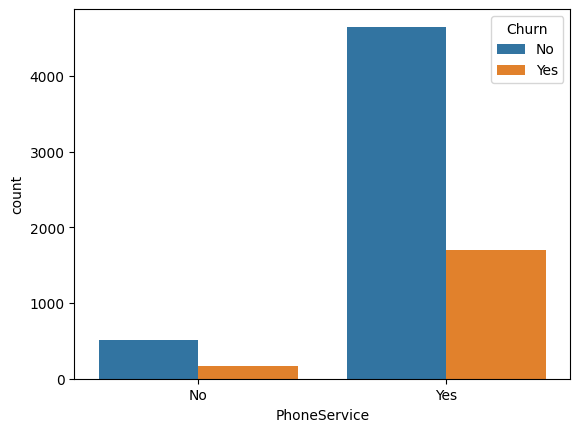

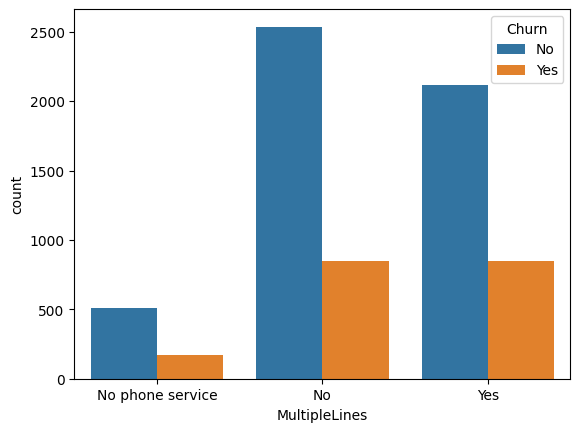

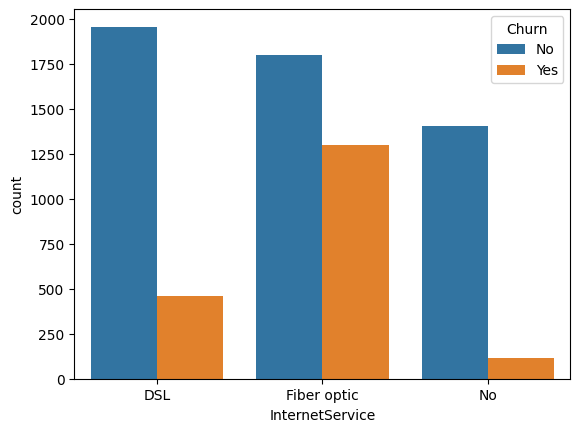

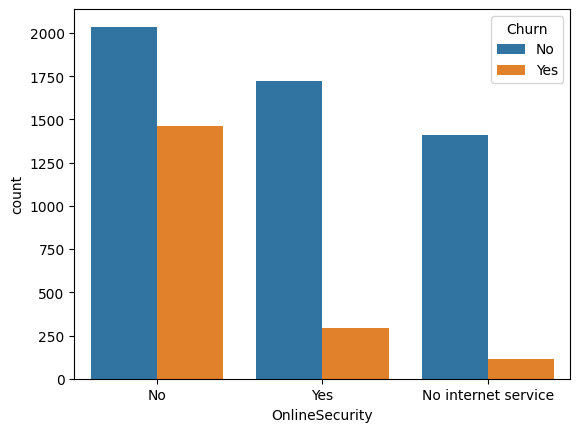

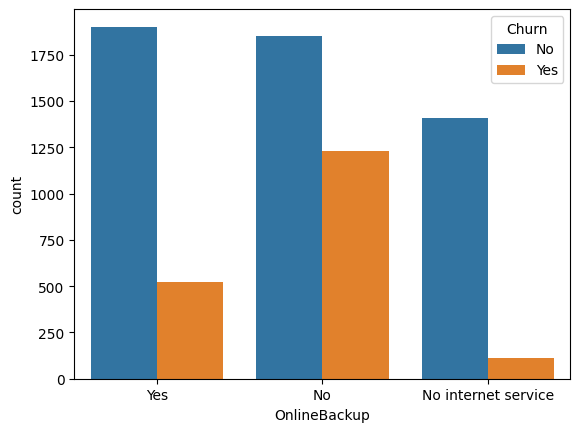

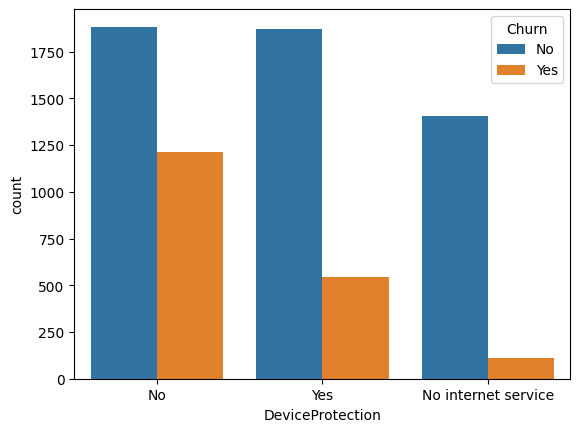

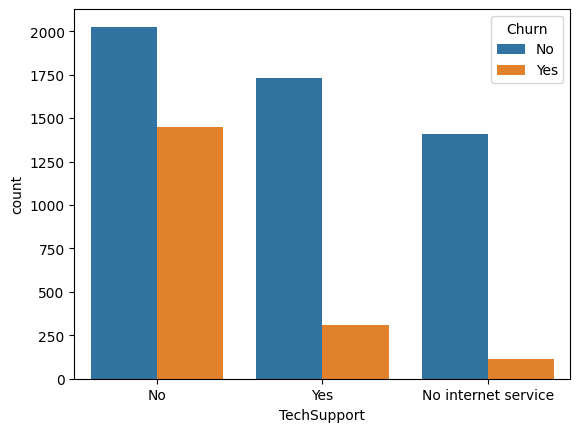

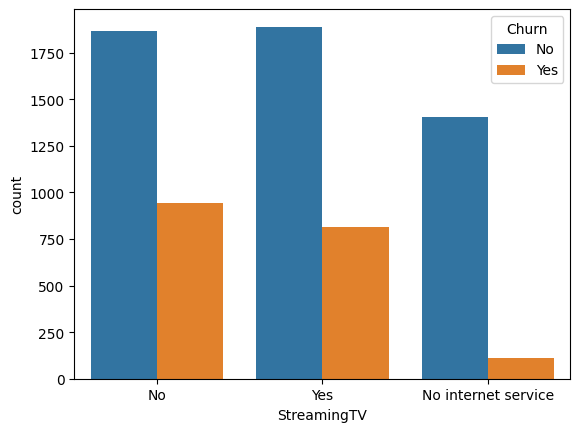

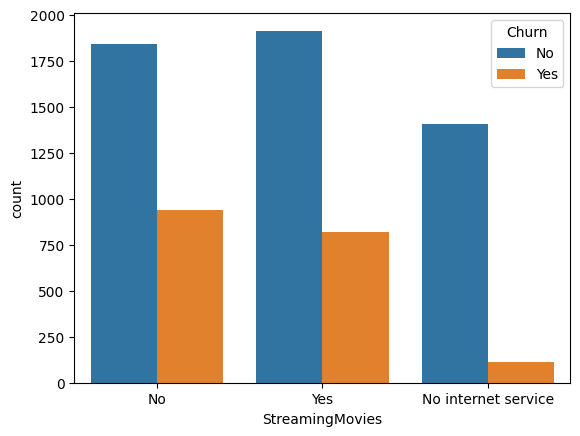

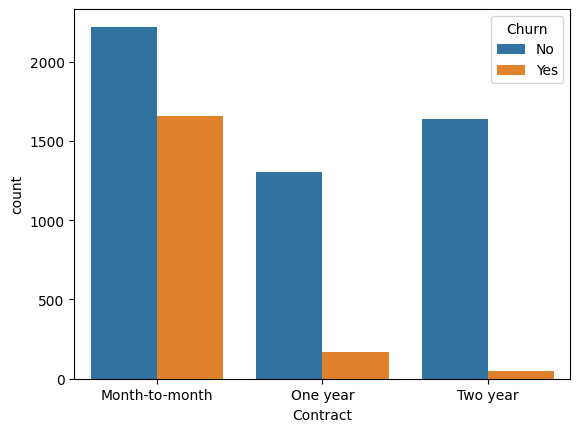

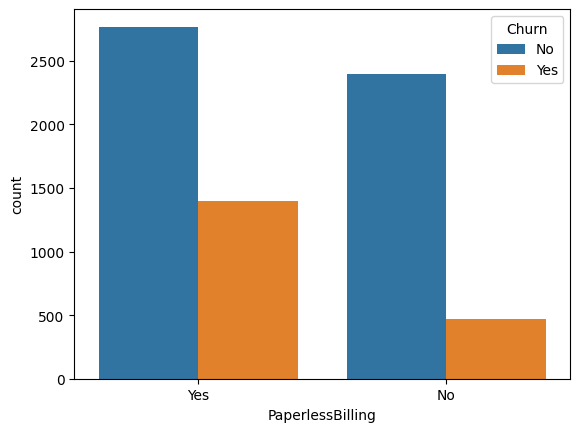

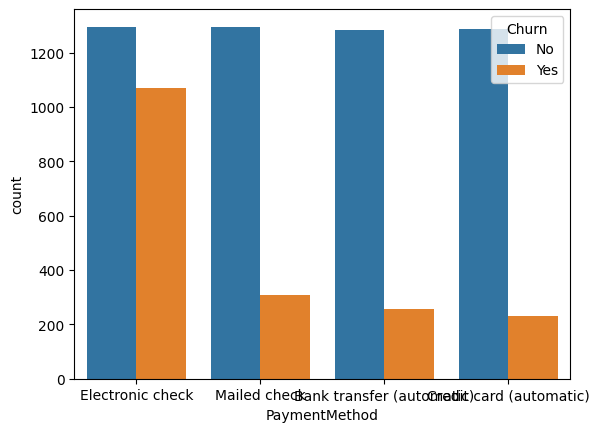

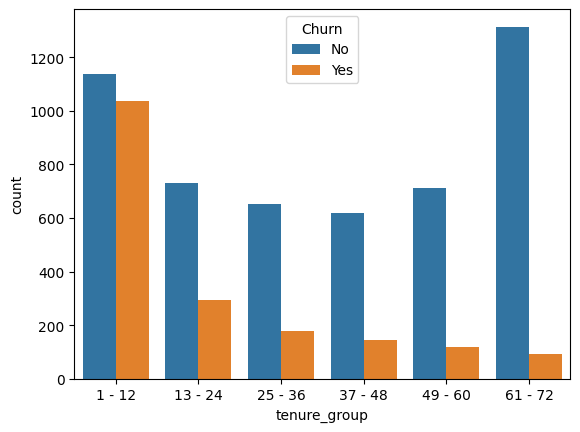

In [ ]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

In [ ]:
# Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)
telco_data.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,1 - 12


In [ ]:
# Convert all the categorical variables into dummy variables
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,0,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,0,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


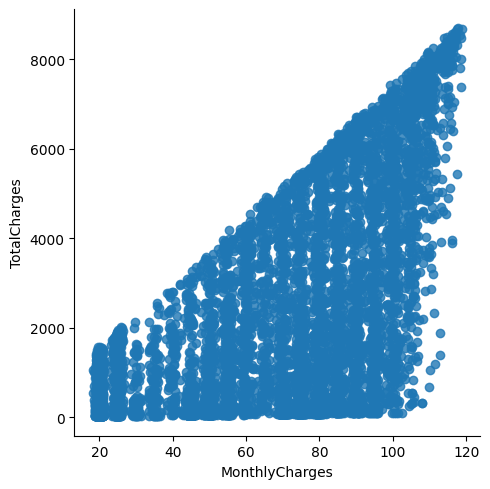

In [ ]:
# Relationship between Monthly Charges and Total Charges
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

C:\Users\Allu Diwakar\AppData\Local\Temp\ipykernel_19844\1509421044.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
C:\Users\Allu Diwakar\AppData\Local\Temp\ipykernel_19844\1509421044.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

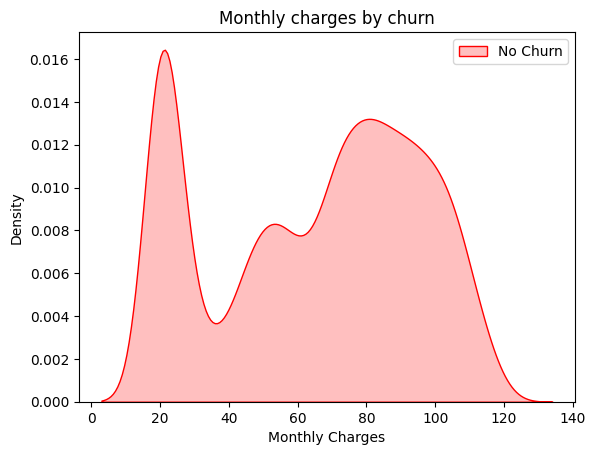

In [ ]:
# Churn by Monthly Charges and Total Charges

Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

C:\Users\Allu Diwakar\AppData\Local\Temp\ipykernel_19844\4019118049.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
C:\Users\Allu Diwakar\AppData\Local\Temp\ipykernel_19844\4019118049.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

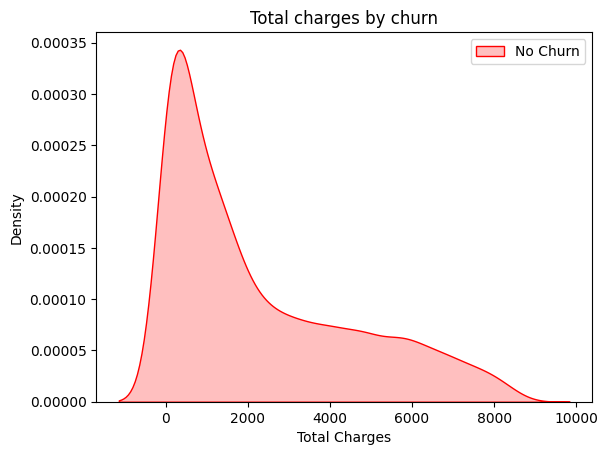

In [ ]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

<Axes: >

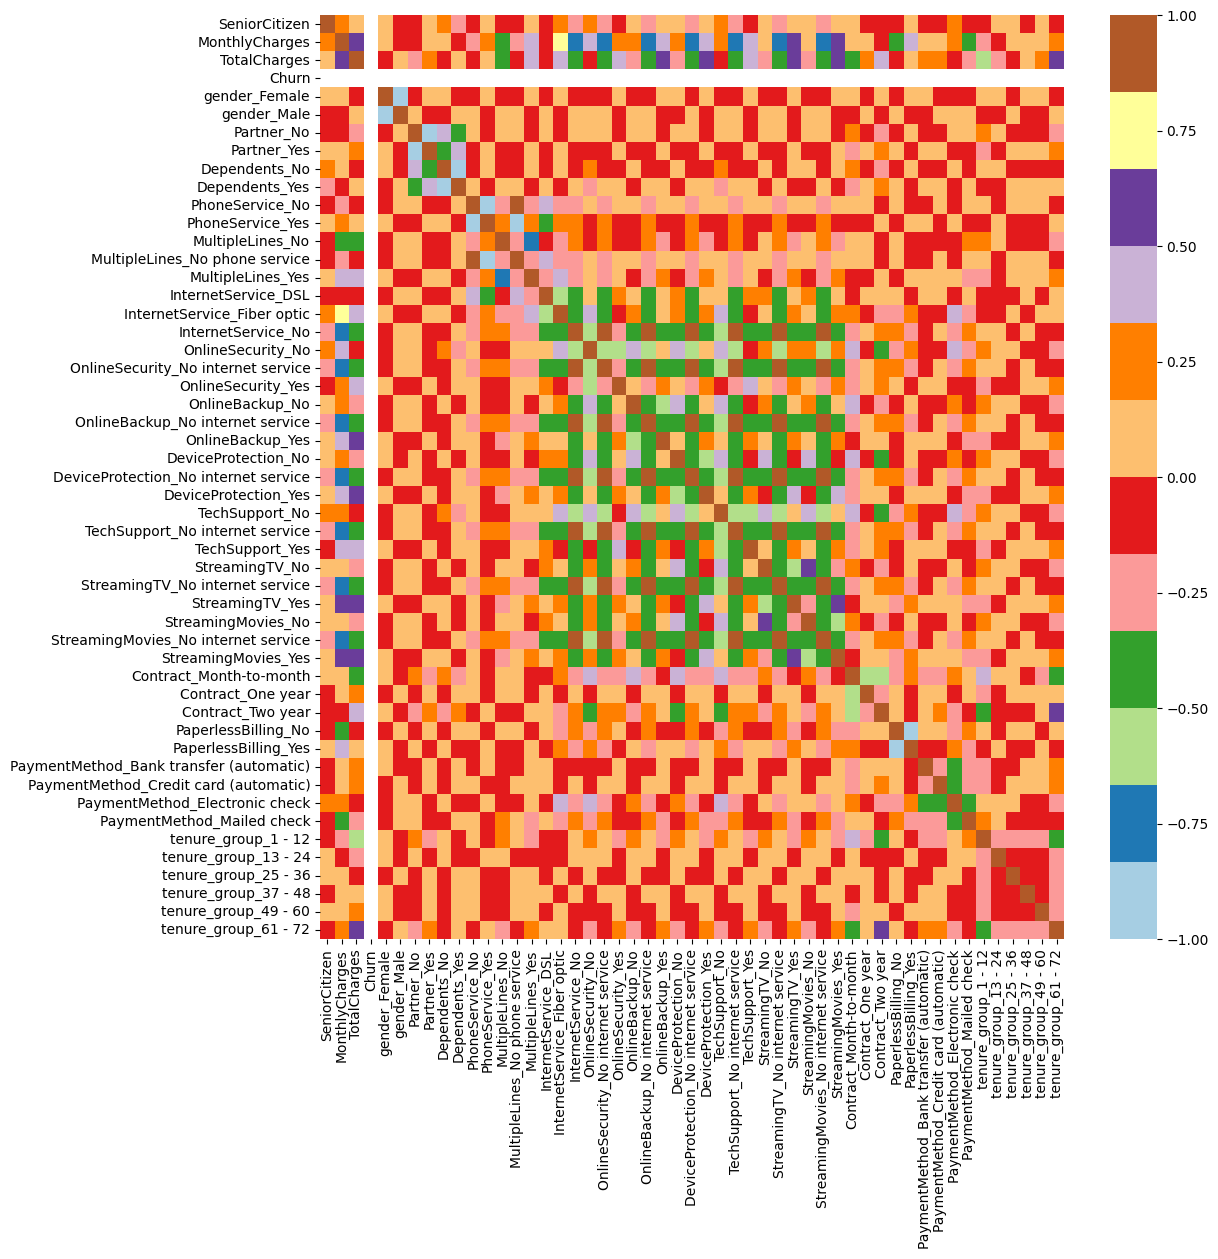

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

##Statically Analysis
- **Distributions**
- **central tendency**
- **Hypothesis testing**
- **z–score**


### Distributions

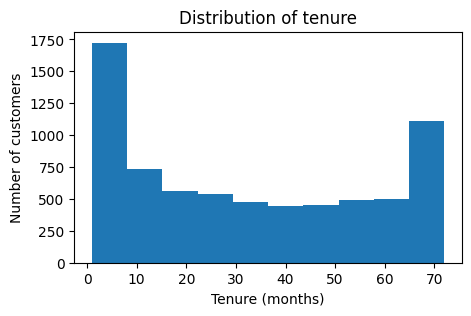

In [ ]:
# Calculate the distribution of each feature
# Create a histogram of the `tenure` feature
plt.figure(figsize=(5, 3))
plt.hist(df2['tenure'])
plt.xlabel('Tenure (months)')
plt.ylabel('Number of customers')
plt.title('Distribution of tenure')
plt.show()

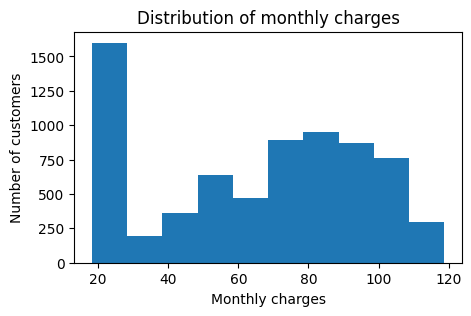

In [ ]:
# Create a histogram of the `MonthlyCharges` feature
plt.figure(figsize=(5, 3))
plt.hist(df2['MonthlyCharges'])
plt.xlabel('Monthly charges')
plt.ylabel('Number of customers')
plt.title('Distribution of monthly charges')
plt.show()

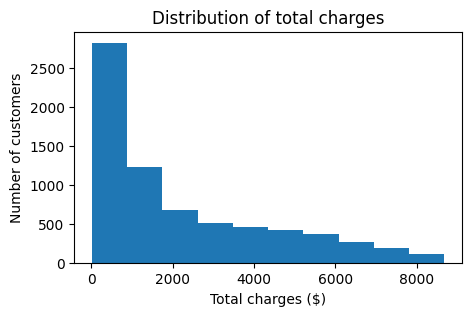

In [ ]:
# Create a histogram of the `TotalCharges` feature
plt.figure(figsize=(5, 3))
plt.hist(df2['TotalCharges'])
plt.xlabel('Total charges ($)')
plt.ylabel('Number of customers')
plt.title('Distribution of total charges')
plt.show()

### central tendency

In [ ]:
# Calculate the central tendency of each feature
columns = ['tenure','MonthlyCharges','TotalCharges']
for feature in df.columns:
    if feature in columns:
        print(f"Mean of {feature}: {df[feature].mean()}")
        print(f"Median of {feature}: {df[feature].median()}")
        print(f"Mode of {feature}: {df[feature].mode()}")

Mean of tenure: 0.4425603678956561
Median of tenure: 0.3943661971830986
Mode of tenure: 0    0.0
Name: tenure, dtype: float64
Mean of MonthlyCharges: 0.46316625065797296
Median of MonthlyCharges: 0.5184079601990049
Mode of MonthlyCharges: 0    0.01791
Name: MonthlyCharges, dtype: float64
Mean of TotalCharges: 0.25099382495369926
Median of TotalCharges: 0.15124542822970652
Mode of TotalCharges: 0    0.079128
Name: TotalCharges, dtype: float64


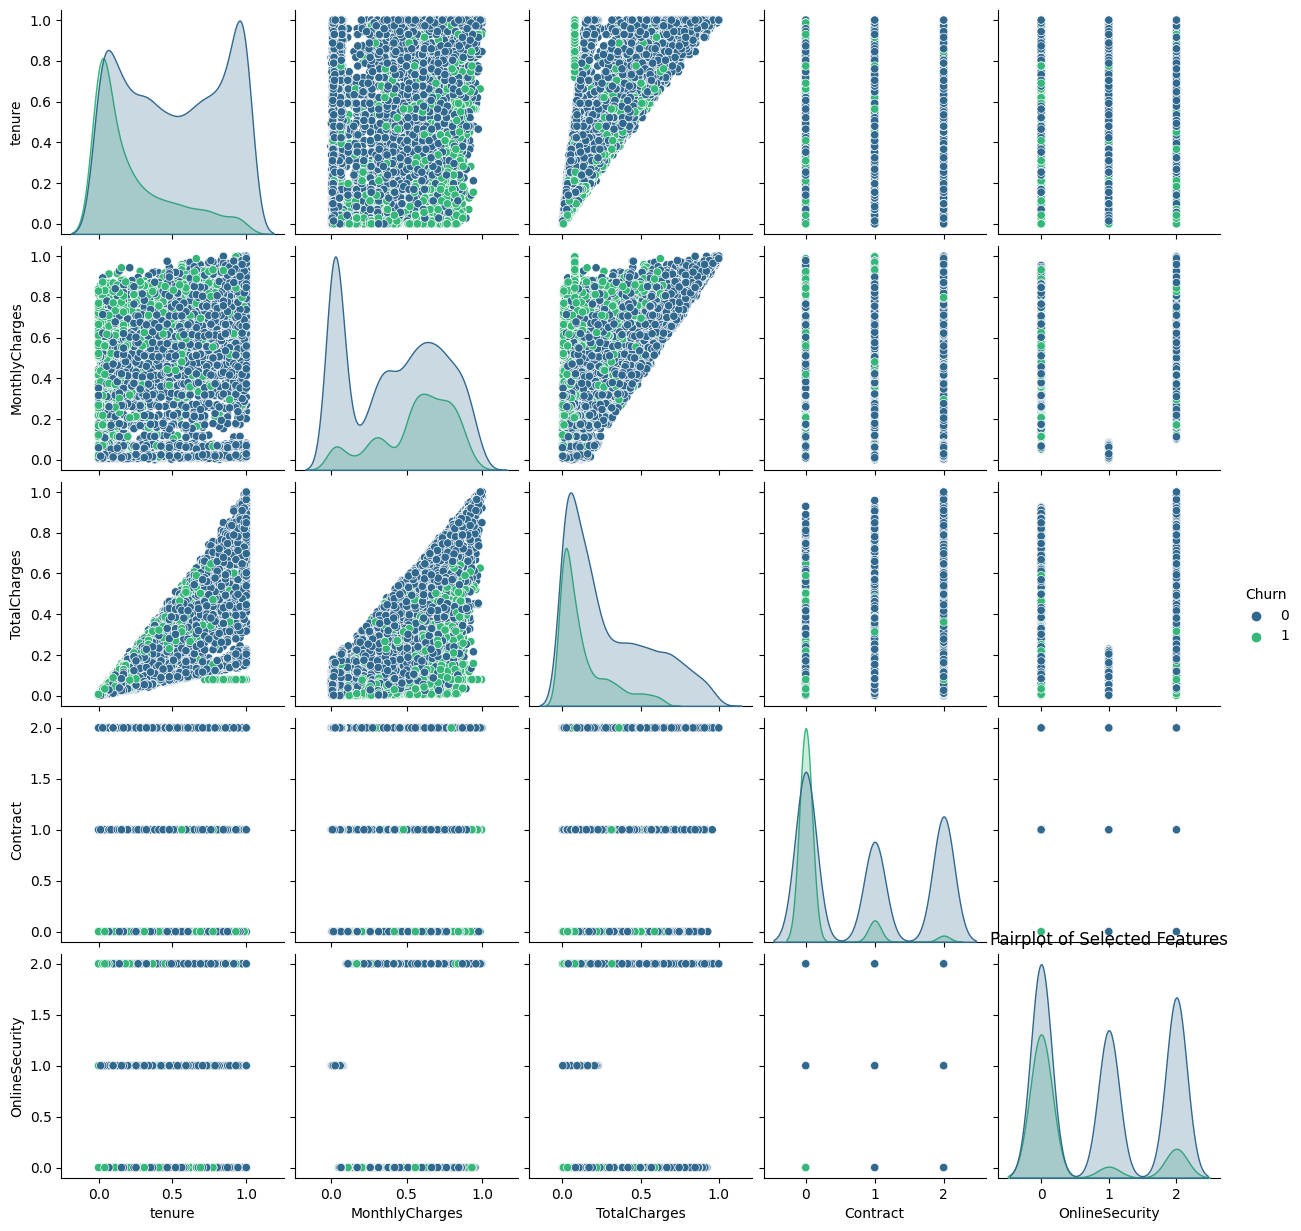

In [ ]:
# Pairplot for selected features
selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'OnlineSecurity', 'Churn']
sns.pairplot(df[selected_features], hue='Churn', palette='viridis')
plt.title('Pairplot of Selected Features')
plt.show()

# ML Model

In [ ]:
# Logistic Regression
# Decision Trees
# Random Forests
# Gradient Boosting Machines (GBMs)
# Extreme Gradient Boosting (XGBoost)
# AdaBoost
# K-Nearest Neighbors (K-NN)
# Support Vector Machines (SVMs)
# Naive Bayes

### Splitting data for Training and Testing purpose in 80:20 ratio

In [ ]:
y = df_unsampled['Churn'].values
X = df_unsampled.drop(columns = ['Churn'])

# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Logistic regression

In [ ]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
accuracy_logreg=metrics.accuracy_score(y_test, prediction_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7744433688286544


### DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create the Decision Tree classifier
model_dt = DecisionTreeClassifier()

# Train the model
model_dt.fit(X_train, y_train)

# Make predictions
prediction_test = model_dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, prediction_test)

print("Accuracy:", accuracy_dt)


Accuracy: 0.8872216844143272


### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100,max_depth=10)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
accuracy_rf=metrics.accuracy_score(y_test, prediction_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8644724104549855


### GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting Machine classifier
model_gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
model_gbm.fit(X_train, y_train)

# Make predictions
prediction_test = model_gbm.predict(X_test)

# Evaluate the model
accuracy_gbm = accuracy_score(y_test, prediction_test)
print("Accuracy:", accuracy_gbm)

Accuracy: 0.808809293320426


### Extreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy_xgb=metrics.accuracy_score(y_test, preds)
print(accuracy_xgb)

0.8717328170377541


### AdaBoost

In [ ]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()


model.fit(X_train,y_train)
preds = model.predict(X_test)
accuracy_adaboost=metrics.accuracy_score(y_test, preds)
print(accuracy_adaboost)

0.7894482090997096


### K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create the K-Nearest Neighbors classifier
model_knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
model_knn.fit(X_train, y_train)

# Make predictions
prediction_test = model_knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, prediction_test)
print("Accuracy:", accuracy_knn)

Accuracy: 0.7792836398838335


### Support Vector Machines

In [ ]:
from sklearn.svm import SVC
# Train an SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
accuracy_svm= svm_classifier.score(X_test, y_test)
print('SVM accuracy:', svm_classifier.score(X_test, y_test))

SVM accuracy: 0.7850919651500484


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Train a Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
accuracy_nb= nb_classifier.score(X_test, y_test)
print('Naive Bayes accuracy:', nb_classifier.score(X_test, y_test))

Naive Bayes accuracy: 0.755082284607938


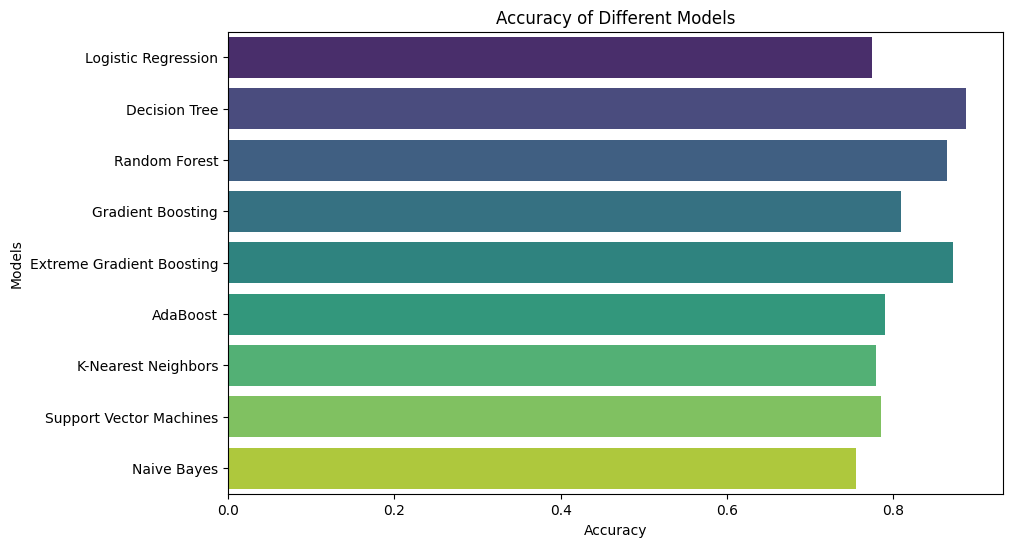

In [ ]:
# Evaluation Metrics and Plotting

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def evaluate_model(model, X_test, y_test):
    # Make predictions
    predictions = model.predict(X_test)

    # Accuracy
    accuracy = metrics.accuracy_score(y_test, predictions)
    print(f'Accuracy: {accuracy}')

    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print('Classification Report:')
    print(classification_report(y_test, predictions))

# Plotting Accuracies of all models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Extreme Gradient Boosting', 'AdaBoost', 'K-Nearest Neighbors', 'Support Vector Machines', 'Naive Bayes']
accuracies = [accuracy_logreg, accuracy_dt, accuracy_rf, accuracy_gbm, accuracy_xgb, accuracy_adaboost, accuracy_knn, accuracy_svm, accuracy_nb]

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=models, palette='viridis')
plt.title('Accuracy of Different Models')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.show()




#### Top 3 highest accuracy algorithms - DecisionTree,RandomForest,Extreme Gradient Boosting

# GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pickle  # Import pickle instead of joblib
from sklearn.model_selection import train_test_split
import pandas as pd

# Sample data
# Assuming X and y are your features and target variable, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the classifiers
classifiers = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Define the hyperparameters to tune
hyperparameter_grids = {
    'DecisionTree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'RandomForest': {
        'n_estimators': [150, 200, 250, 300],
        'max_depth': [15, 20, 25],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500, 1000],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7]
    }
}

# Perform GridSearchCV for each classifier
results = []
trained_models = {}

for classifier_name, classifier in classifiers.items():
    hyperparameter_grid = hyperparameter_grids[classifier_name]
    grid_search = GridSearchCV(classifier, hyperparameter_grid, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Save the trained model using pickle
    model_filename = f"{classifier_name}_model.pkl"
    with open(model_filename, 'wb') as model_file:
        pickle.dump(grid_search.best_estimator_, model_file)
    trained_models[classifier_name] = model_filename

    # Append results to a list
    results.append((classifier_name, best_params, best_score))

# Create a Pandas DataFrame from the results list
table = pd.DataFrame(results, columns=['Classifier Name', 'Best Parameters', 'Best Score'])

# Print the DataFrame
print(table.to_string())

# Save the dictionary of trained models using pickle
with open('trained_models.pkl', 'wb') as models_file:
    pickle.dump(trained_models, models_file)



  Classifier Name                                                                           Best Parameters  Best Score
0    DecisionTree  {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}    0.871429
1    RandomForest                            {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}    0.897337
2         XGBoost                               {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 500}    0.887772


### Top 2 highest algorithms - RandomForest and Extreme Gradient Boosting

#Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score,ShuffleSplit

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2)


dt_scores = cross_val_score(DecisionTreeClassifier(random_state=0), X, y, cv=cv)

# Print the average cross-validation scores

print("Average Cross-Validation Score - Decision Tree:", dt_scores.mean())


Average Cross-Validation Score - Decision Tree: 0.8895450145208132


In [ ]:
# Define the number of splits and the test set size for cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.2)

# Perform cross-validation using the cross_val_score method
rf_scores =cross_val_score(RandomForestClassifier(random_state=0), X, y, cv=cv)


# Print the average cross-validation scores
print("Average Cross-Validation Score - Random Forest:", rf_scores.mean())




Average Cross-Validation Score - Random Forest: 0.9030009680542109


In [ ]:
# Define the number of splits and the test set size for cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.2)
# Perform cross-validation using the cross_val_score method

xgb_scores = cross_val_score(XGBClassifier(random_state=0), X, y, cv=cv)

print("Average Cross-Validation Score - Extreme Gradient Boosting:", xgb_scores.mean())



Average Cross-Validation Score - Extreme Gradient Boosting: 0.8764762826718296


In [ ]:
from sklearn.model_selection import StratifiedKFold

# Define the number of splits for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

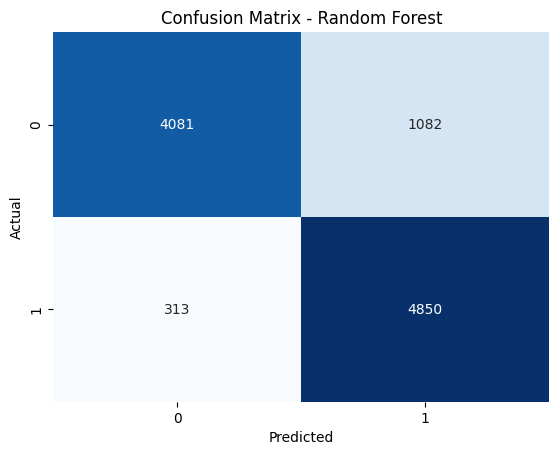

In [ ]:
# Confusion Matrix and Data Visualizations for Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_pred = cross_val_predict(rf_model, X, y, cv=cv)
plot_confusion_matrix(y, rf_pred, 'Random Forest')

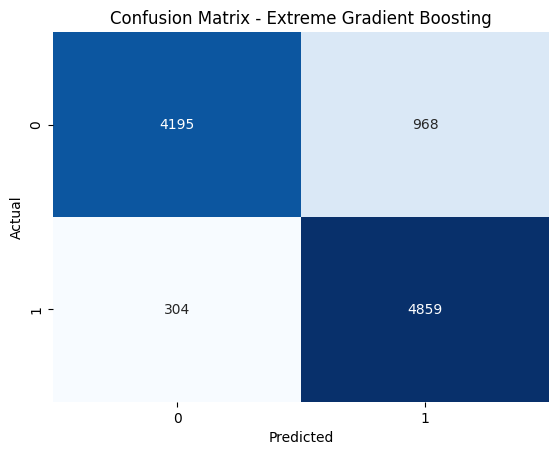

In [ ]:
# Confusion Matrix and Data Visualizations for Extreme Gradient Boosting
xgb_model = XGBClassifier()
xgb_pred = cross_val_predict(xgb_model, X, y, cv=cv)
plot_confusion_matrix(y, xgb_pred, 'Extreme Gradient Boosting')

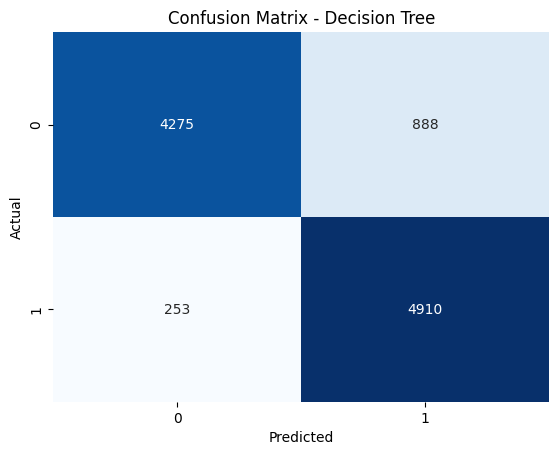

In [ ]:
# Confusion Matrix and Data Visualizations for Decision Tree
dt_model = DecisionTreeClassifier()
dt_pred = cross_val_predict(dt_model, X, y, cv=cv)
plot_confusion_matrix(y, dt_pred, 'Decision Tree')

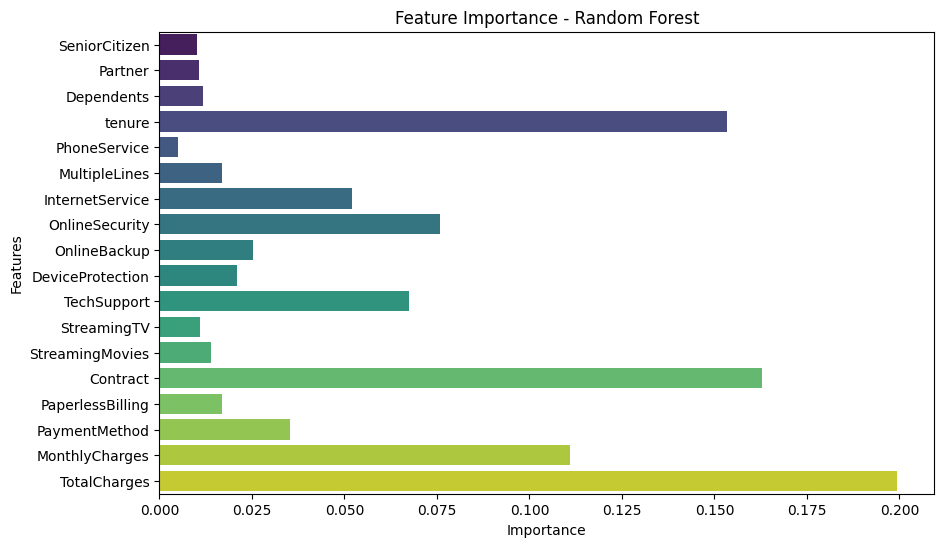

In [ ]:
# Additional Data Visualizations
# Feature Importance Plot for RandomForest
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_model.fit(X, y).feature_importances_, y=X.columns, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.show()